In [3]:
import tempfile
import os
import glob
from tqdm import tqdm

import tensorflow as tf
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, models

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


# Reading Train and Test Datasets

In [4]:
directory = './trainfolders/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42, validation_split=0.2, subset="training"
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42, validation_split=0.2, subset="validation"
)

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [25]:
gaussdirectory = './noisydata/gaussian50/'
gaussian_testds = tf.keras.preprocessing.image_dataset_from_directory(
    gaussdirectory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
saltdirectory = './noisydata/salt-n-pepper/'
salt_testds = tf.keras.preprocessing.image_dataset_from_directory(
    saltdirectory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
perioddirectory = './noisydata/periodic/'
period_testds = tf.keras.preprocessing.image_dataset_from_directory(
    perioddirectory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)

Found 12630 files belonging to 43 classes.
Found 12630 files belonging to 43 classes.
Found 12630 files belonging to 43 classes.


In [27]:
testdirectory = './testfolders/'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testdirectory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)

grey_testdirectory = './graydata/test/'
grey_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    grey_testdirectory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)

Found 12630 files belonging to 43 classes.
Found 12630 files belonging to 43 classes.


# Defining CNN Model

In [7]:
def getModel():
    num_classes = 43
    img_height=40
    img_width=40


    model = models.Sequential([
      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)
    ])
    
    return model

In [36]:
def getGaussNoiseModel():
    num_classes = 43
    img_height=40
    img_width=40


    model = models.Sequential([
      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.GaussianNoise(1.7775),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)
    ])
    
    return model

# Experiments

## Experiment 1: Effect Noise on Trained CNN Image Classifiers 

In [9]:
snpmodel1 = getModel()
snpmodel1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
snpmodel1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 40, 40, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0

In [11]:
epochs=10
snphistory1 = snpmodel1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    verbose=1
)

Epoch 1/10
981/981 [==============================] - 215s 219ms/step - loss: 1.4374 - accuracy: 0.6037 - val_loss: 0.4859 - val_accuracy: 0.8621
Epoch 2/10
981/981 [==============================] - 25s 26ms/step - loss: 0.3336 - accuracy: 0.9022 - val_loss: 0.2509 - val_accuracy: 0.9262loss: 0.5019 - accuracy: 0.8 - ETA: 19s - loss: 0.4952 - accuracy:  - ETA: 18s - loss: 0.4856 -  - ETA: 17s - loss: 0.484 - ETA: 16s -  - ETA: 14s - loss: 0.4416 - a - ETA: 10s - loss: 0.4014 - accuracy:  - ETA: 10s - loss: 0.3967 - accuracy: 0.8 - ETA: 9s - loss: 0.3930 - a - ETA: 9s - loss: 0.3889 - accuracy:  - ETA: 9s - loss: - ETA: 8s - loss: 0.3851 - accu - ETA: 8s - loss: 0.3825 - accuracy: 0. - ETA: 7s - loss: 0.3812 - accuracy: 0.88 - E - ETA: 3s - - ETA: 2s - loss: 0.3451 - accuracy: 0. - ETA: 2s - loss: 0.3442 - accu - ETA: 2s - loss: 0.342 - ETA: 1s - loss: 0.3400 - accu - ETA: 1s - - ETA: 0s - loss: 0.3344 - accuracy: 0.
Epoch 3/10
981/981 [==============================] - 26s 26ms/step -

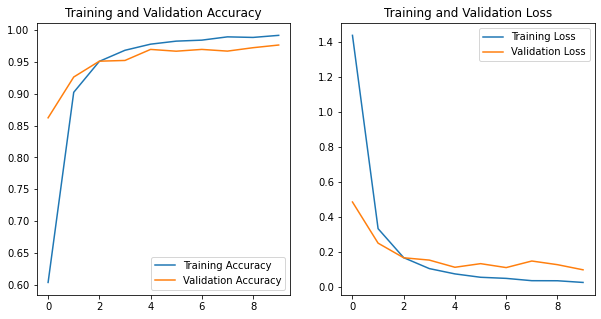

In [12]:
acc = snphistory1.history['accuracy']
val_acc = snphistory1.history['val_accuracy']

loss = snphistory1.history['loss']
val_loss = snphistory1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
test_loss, test_acc = snpmodel1.evaluate(test_ds, verbose=1)

395/395 [==============================] - 37s 94ms/step - loss: 0.6562 - accuracy: 0.8821: 14s - los - ETA: 4s - los - ETA: 2s - loss: 0.654


#### salt and pepper with a probability of 0.4%

In [14]:
test_loss, test_acc = snpmodel1.evaluate(salt_testds, verbose=1)

395/395 [==============================] - 8s 21ms/step - loss: 2.4364 - accuracy: 0.6811 1s - loss: 2.4421 - accuracy: 0. - ETA: 


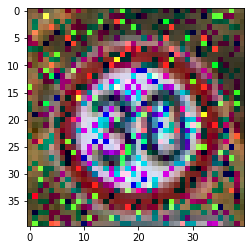

In [27]:
get = next(iter(salt_testds))

plt.imshow(get[0][0].numpy().astype("uint8"))

#### Gaussian noise with kernel standard deviation +50

In [19]:
test_loss, test_acc = snpmodel1.evaluate(gaussian_testds, verbose=1)

395/395 [==============================] - 8s 20ms/step - loss: 40.0037 - accuracy: 0.0474: 2s - loss: 39.9744 - - ETA: 1s - loss: 39.9711 - accur - ETA: 0s - loss: 40.0276 - accura


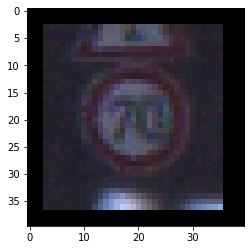

In [29]:
get = next(iter(gaussian_testds))

plt.imshow(get[0][0].numpy().astype("uint8"))

#### Periodic noise with frequency 

In [32]:
test_loss, test_acc = snpmodel1.evaluate(period_testds, verbose=1)

395/395 [==============================] - 28s 70ms/step - loss: 18.6441 - accuracy: 0.1054 24s - loss: 18.450 - ETA: 2s - loss: 18.6220 - a


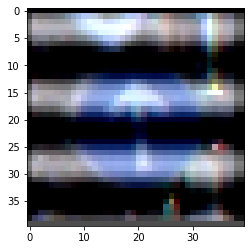

In [30]:
get = next(iter(period_testds))

plt.imshow(get[0][0].numpy().astype("uint8"))

## Experiment 2: Effect of 50% less noise on Trained CNN Image Classifiers

In [31]:
gauss50directory = './noisydata/gaussian25/'
gaussian_50_testds = tf.keras.preprocessing.image_dataset_from_directory(
    gauss50directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
salt50directory = './noisydata/salt-n-pepper0.001/'
salt_50_testds = tf.keras.preprocessing.image_dataset_from_directory(
    salt50directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
period50directory = './noisydata/periodic0.25/'
period_50_testds = tf.keras.preprocessing.image_dataset_from_directory(
    period50directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)

Found 12630 files belonging to 43 classes.
Found 12630 files belonging to 43 classes.
Found 12630 files belonging to 43 classes.


In [32]:
test_loss, test_acc = snpmodel1.evaluate(test_ds, verbose=1)

395/395 [==============================] - 8s 21ms/step - loss: 0.6562 - accuracy: 0.8821 4s - l - ETA: 3s - loss: 0.6299 - ac - ETA: 1s - loss: 0.6572  - E


#### salt and pepper with a probability of 0.2%

In [33]:
test_loss, test_acc = snpmodel1.evaluate(salt_50_testds, verbose=1)

395/395 [==============================] - 9s 22ms/step - loss: 1.5981 - accuracy: 0.7553


#### Gaussian noise with kernel standard deviation +25

In [34]:
test_loss, test_acc = snpmodel1.evaluate(gaussian_50_testds, verbose=1)

395/395 [==============================] - 8s 21ms/step - loss: 40.0037 - accuracy: 0.0474


#### Periodic noise with half frequency 

In [35]:
test_loss, test_acc = snpmodel1.evaluate(period_50_testds, verbose=1)

395/395 [==============================] - 8s 21ms/step - loss: 3.5847 - accuracy: 0.5791


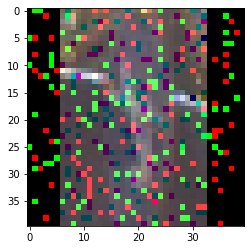

In [36]:
get = next(iter(salt_50_testds))

plt.imshow(get[0][0].numpy().astype("uint8"))

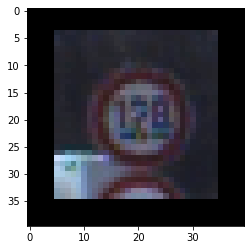

In [37]:
get = next(iter(gaussian_50_testds))

plt.imshow(get[0][0].numpy().astype("uint8"))

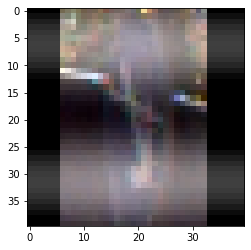

In [38]:
get = next(iter(period_50_testds))

plt.imshow(get[0][0].numpy().astype("uint8"))

### Experiment 3:  A more detailed look at Periodic Noise

#### Experiment 3.1 :- 50% less magnitude (not frequency) periodic noise

Found 12630 files belonging to 43 classes.
395/395 [==============================] - 9s 22ms/step - loss: 9.0131 - accuracy: 0.3189


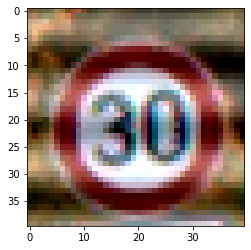

In [39]:
period05directory = './noisydata/periodic0.25/'

period_05_testds = tf.keras.preprocessing.image_dataset_from_directory(
    period50directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
test_loss, test_acc = snpmodel1.evaluate(period_50_testds, verbose=1)

get = next(iter(period_50_testds))
plt.imshow(get[0][0].numpy().astype("uint8"))

#### Experiment 3.2 :- vertical/column periodic noise - sine wave

Found 12630 files belonging to 43 classes.
395/395 [==============================] - 8s 21ms/step - loss: 9.3244 - accuracy: 0.2102 1s - loss: 9.3 - ETA: 0s - loss: 9.3338 - accu


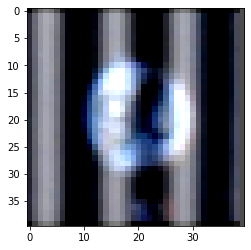

In [17]:
periodVertdirectory = './noisydata/periodic_vert/'

periodVerttestds = tf.keras.preprocessing.image_dataset_from_directory(
    periodVertdirectory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
test_loss, test_acc = snpmodel1.evaluate(periodVerttestds, verbose=1)

get = next(iter(periodVerttestds))
plt.imshow(get[0][1].numpy().astype("uint8"))

#### Experiment 3.3 :- Sine wave plus Cosine wave

Found 12630 files belonging to 43 classes.
395/395 [==============================] - 8s 20ms/step - loss: 5.6357 - accuracy: 0.3934


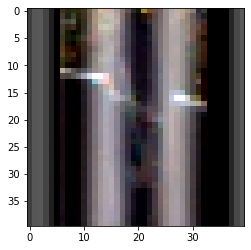

In [19]:
periodMixdirectory = './noisydata/periodic_mix/'

periodMixtestds = tf.keras.preprocessing.image_dataset_from_directory(
    periodMixdirectory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
test_loss, test_acc = snpmodel1.evaluate(periodMixtestds, verbose=1)

get = next(iter(periodMixtestds))
plt.imshow(get[0][0].numpy().astype("uint8"))

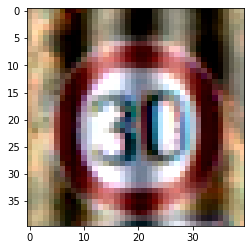

In [22]:
get = next(iter(periodMixtestds))
plt.imshow(get[0][0].numpy().astype("uint8"))

## Experiment 4: Effect of 25% less noise on Trained CNN Image Classifiers

#### salt and pepper noise with a probability of 0.1%

Found 12630 files belonging to 43 classes.
395/395 [==============================] - 9s 22ms/step - loss: 1.3543 - accuracy: 0.8057 7s - loss: 1.1774 - accuracy:  - ETA: 4s - l - ETA: 3s - loss: 1.3342 - ac - ETA: 3s - loss: 1.3416 - accu - ETA: 2s - ETA: 0s - loss: 1.3579 - accuracy: 


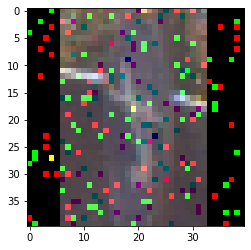

In [28]:
period01directory = './noisydata/salt-n-pepper0.001/'

period01testds = tf.keras.preprocessing.image_dataset_from_directory(
    period01directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
test_loss, test_acc = snpmodel1.evaluate(period01testds, verbose=1)

get = next(iter(period01testds))
plt.imshow(get[0][0].numpy().astype("uint8"))

#### Gaussian Noise with a kernel standard deviation of 5

Found 12630 files belonging to 43 classes.
395/395 [==============================] - 8s 21ms/step - loss: 40.9909 - accuracy: 0.0462: 7s - loss: 41.833 - ETA: 6s - loss: 41.0004 - accuracy: 0.0 - ETA: 5s - loss: 40.9084 - accuracy: 0 - ETA: 5s - loss - ETA: 3s - loss: 40.9278 - accuracy:  - ETA: 3s - loss: 40.9765 - accura - ETA: 2s - loss: 41.0208  - ETA: 1s - loss: 4


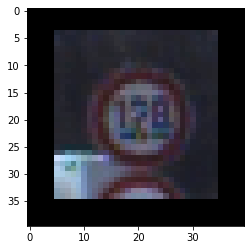

In [29]:
gauss5directory = './noisydata/gaussian5/'

gauss5testds = tf.keras.preprocessing.image_dataset_from_directory(
    gauss5directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
test_loss, test_acc = snpmodel1.evaluate(gauss5testds, verbose=1)

get = next(iter(gauss5testds))
plt.imshow(get[0][0].numpy().astype("uint8"))

#### periodic noise with a quarter magnitude 

Found 12630 files belonging to 43 classes.
395/395 [==============================] - 9s 22ms/step - loss: 1.7565 - accuracy: 0.7444 1s - loss: 1.7665 - accuracy:  - ETA: 1s - loss: 1 - ETA: 0s - loss: 1.7651 - accuracy


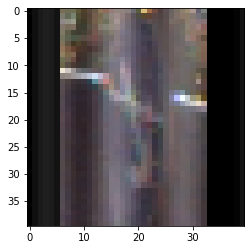

In [31]:
period25directory = './noisydata/periodic0.25/'

period25testds = tf.keras.preprocessing.image_dataset_from_directory(
    period25directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
test_loss, test_acc = snpmodel1.evaluate(period25testds, verbose=1)

get = next(iter(period25testds))
plt.imshow(get[0][0].numpy().astype("uint8"))

## Experiment 5: A closer look at Gaussian Noise

##### Gaussian Noise in Training -> more robust network?

In [37]:
model2 = getGaussNoiseModel()
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 40, 40, 3)         0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 40, 40, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 20, 20, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)       

In [39]:
epochs=10
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    verbose=1
)

Epoch 1/10
981/981 [==============================] - 261s 266ms/step - loss: 2.9974 - accuracy: 0.2001 - val_loss: 3.0584 - val_accuracy: 0.2194
Epoch 2/10
981/981 [==============================] - 27s 27ms/step - loss: 2.4073 - accuracy: 0.3275 - val_loss: 2.8697 - val_accuracy: 0.2806ss: 2.5508 - accuracy: - ETA: - ETA: 16s - loss: 2.5162 - accuracy - ETA: 16s - loss: 2.5082 - accuracy: 0.31 - ETA: 16s - loss: 2.5057 - accuracy:  - ETA: 15s - loss: 2.4985 - accuracy:  - ETA: 15s - loss: 2.4934 - accurac - ETA: 14s - loss: 2.4885 - accuracy: 0.3 - ETA: 14s - loss: 2.4829 - a - ETA: 13s - loss: 2.4718 - a - ETA: 12s - loss: 2.4652 - accur - ETA: 11s - loss:  - ETA: 10s - loss: 2.4552 - accuracy: 0 - ETA: 9s - loss: 2.4532 - accuracy: 0 - ETA: 6s - loss: - ETA: 6s - loss: 2.423 - ETA: 5s - loss: 2.4220 - accu - ETA: 3s - loss: 2.4185 - accuracy - ETA: 3s - ETA: 1s - l
Epoch 3/10
981/981 [==============================] - 27s 28ms/step - loss: 2.2378 - accuracy: 0.3618 - val_loss: 2.55

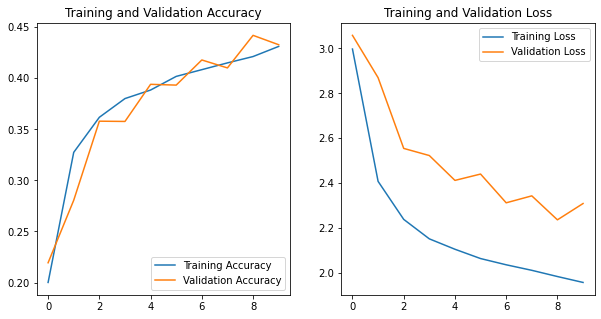

In [40]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
test_loss, test_acc = model2.evaluate(test_ds, verbose=1)

395/395 [==============================] - 51s 130ms/step - loss: 2.4481 - accuracy: 0.3811


In [47]:
test_loss, test_acc = model2.evaluate(salt_testds, verbose=1)

395/395 [==============================] - 24s 62ms/step - loss: 2.4187 - accuracy: 0.3984


In [48]:
test_loss, test_acc = model2.evaluate(gaussian_testds, verbose=1)

395/395 [==============================] - 25s 62ms/step - loss: 4.0335 - accuracy: 0.0515


In [49]:
test_loss, test_acc = model2.evaluate(period_testds, verbose=1)

395/395 [==============================] - 25s 62ms/step - loss: 4.2912 - accuracy: 0.08141s


##### Gaussian Variation on the Dataset and it's effect on Image Recognition

In [43]:
# loop for Gaussian on the images and then test each time?

## Experiment 6: Grey-Scale Testing on color trained

Found 12630 files belonging to 43 classes.
395/395 [==============================] - 20s 52ms/step - loss: 1.9839 - accuracy: 0.7241: 28s - - ETA: 10s - loss: 1.9173 - acc - ETA: 9s - los - ETA: 7s - loss: 1.9803 - accuracy - E - ETA: 0s - loss: 1.9823 - accuracy


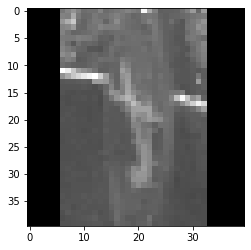

In [33]:
graydir = './graydata/test/'

graytest_ds = tf.keras.preprocessing.image_dataset_from_directory(
    graydir, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(40,
    40), shuffle=True, seed=42,
)
test_loss, test_acc = snpmodel1.evaluate(graytest_ds, verbose=1)

get = next(iter(graytest_ds))
plt.imshow(get[0][0].numpy().astype("uint8"))

## Experiment 6 (Behaviour Subsection): Gray-Scale Trained model /

#### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(valid_generator, valid_generator.samples //valid_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = class_names
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))